## 1-EDA (Exploratory Data Analysis)

In [50]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [51]:
# Loading Dataset
df = pd.read_csv('car_data.csv')
orignal_df = df
index = df.columns[0]

In [52]:
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [53]:
df.info

<bound method DataFrame.info of         Unnamed: 0       brand              model  color registration_date  \
0                0  alfa-romeo     Alfa Romeo GTV    red           10/1995   
1                1  alfa-romeo     Alfa Romeo 164  black           02/1995   
2                2  alfa-romeo  Alfa Romeo Spider  black           02/1995   
3                3  alfa-romeo  Alfa Romeo Spider  black           07/1995   
4                4  alfa-romeo     Alfa Romeo 164    red           11/1996   
...            ...         ...                ...    ...               ...   
251074      251074       volvo         Volvo XC40  white           04/2023   
251075      251075       volvo         Volvo XC90  white           03/2023   
251076      251076       volvo          Volvo V60  white           05/2023   
251077      251077       volvo         Volvo XC40  white           05/2023   
251078      251078       volvo         Volvo XC40   gold           03/2023   

        year price_in_euro powe

In [54]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0       brand              model  color registration_date  \
0                0  alfa-romeo     Alfa Romeo GTV    red           10/1995   
1                1  alfa-romeo     Alfa Romeo 164  black           02/1995   
2                2  alfa-romeo  Alfa Romeo Spider  black           02/1995   
3                3  alfa-romeo  Alfa Romeo Spider  black           07/1995   
4                4  alfa-romeo     Alfa Romeo 164    red           11/1996   
...            ...         ...                ...    ...               ...   
251074      251074       volvo         Volvo XC40  white           04/2023   
251075      251075       volvo         Volvo XC90  white           03/2023   
251076      251076       volvo          Volvo V60  white           05/2023   
251077      251077       volvo         Volvo XC40  white           05/2023   
251078      251078       volvo         Volvo XC40   gold           03/2023   

        year price_in_euro po

In [55]:
# As an example, we extract the unique values from brand column and counting rows for each brand
unique_brands = df['brand'].unique()
num_unique_brands = len(unique_brands)
print(f'there are {num_unique_brands} unique brands in the dataset.')
print('the brands are: ')
for brand in unique_brands:
    print(brand)
print('\nNumber of rows for each brand:')
brand_counts = df['brand'].value_counts()
print(brand_counts)

there are 47 unique brands in the dataset.
the brands are: 
alfa-romeo
aston-martin
audi
bentley
bmw
cadillac
chevrolet
chrysler
citroen
dacia
daewoo
daihatsu
dodge
ferrari
fiat
ford
honda
hyundai
infiniti
isuzu
jaguar
jeep
kia
lada
lamborghini
lancia
land-rover
maserati
mazda
mercedes-benz
mini
mitsubishi
nissan
opel
peugeot
porsche
proton
renault
rover
saab
seat
skoda
smart
ssangyong
toyota
volkswagen
volvo

Number of rows for each brand:
brand
volkswagen       33281
mercedes-benz    27226
audi             21161
opel             20388
bmw              19810
ford             18790
skoda            14039
seat             11949
renault           8694
toyota            8228
hyundai           6989
peugeot           5848
kia               5734
fiat              5039
mini              4295
mazda             4211
volvo             4164
citroen           4083
porsche           3958
nissan            3784
dacia             3367
land-rover        3073
jeep              1749
smart             16

In [56]:
# listing features
df.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [57]:
# renaming and dropping some columns 
df.rename(columns={"price_in_euro": "price"}, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

In [58]:
"""we select the following features w numerical values
to be considered against the price"""
numerical_cols = ['year','price','power_kw', 'fuel_consumption_g_km',
       'mileage_in_km'] 
print(numerical_cols, type(numerical_cols))

['year', 'price', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km'] <class 'list'>


In [59]:
"""Defining list of categorical features"""
categorical_cols = ['brand', 'model']

In [60]:
selected_cols = numerical_cols + categorical_cols
print(selected_cols, type(selected_cols))

['year', 'price', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km', 'brand', 'model'] <class 'list'>


In [61]:
# Check for missing values in selected features and their ratio to total number of cars
def check_missing(df):
    print("\nMissing values:")
    for x in selected_cols:
        miss_count = df[x].isnull().sum()
        print(x, miss_count, df[x].dtype, miss_count/len(df[x]))
        
check_missing(df)


Missing values:
year 0 object 0.0
price 0 object 0.0
power_kw 134 object 0.0005336965656227721
fuel_consumption_g_km 0 object 0.0
mileage_in_km 152 float64 0.000605387149064637
brand 0 object 0.0
model 0 object 0.0


In [62]:
# since there are only very few missing values, we just drop them
print('total number of listed cars after droppping missing values: ', len(df))

df.dropna(inplace=True)
check_missing(df)

print('total number of listed cars after droppping missing values: ', len(df))

total number of listed cars after droppping missing values:  251079

Missing values:
year 0 object 0.0
price 0 object 0.0
power_kw 0 object 0.0
fuel_consumption_g_km 0 object 0.0
mileage_in_km 0 float64 0.0
brand 0 object 0.0
model 0 object 0.0
total number of listed cars after droppping missing values:  223836


In [63]:
# cleaning column year as it has irrelated values
print('Year column values:')
print(df['year'].unique())

Year column values:
['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023' 'Petrol'
 'Diesel' 'Manual' '04/2006' 'LPG' 'Hybrid' '03/2015' '39.900 km'
 '18.990 km' '05/2021' 'Automatic' '11/2013' 'CNG']


In [64]:
"""Based on above, one has to filter years out of the first 29 
enetries coveriing 1995-2023:
"""
tobefiltered = df['year'].unique()[:29]
newfilter = []
for i in range(df.shape[0]):
    newfilter.append(df['year'].iloc[i] in tobefiltered)
    
df = df[newfilter]
print(df['year'].unique())

['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']


In [65]:
print(len(df['year']))
print(len(df['year'].unique()))
print('ratio of remaining cars after dropping redundant year value: ', len(df)/len(orignal_df))

223733
29
ratio of remaining cars after dropping redundant year value:  0.9995398416697939


The above ratio shows that there were few cars with redundant year value, so dropping them has minor affect on the number of the database. 

In [66]:
# converting types of several columns into numerical
df['price'] = df['price'].astype(int)
df['power_kw'] = df['power_kw'].astype(float)
df['mileage_in_km'] = df['mileage_in_km'].astype(float)
df['year'] = df['year'].astype(int)

/var/folders/px/qy02cbjn2_s1svhmg7_fwh340000gq/T/ipykernel_3471/97314634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(int)
/var/folders/px/qy02cbjn2_s1svhmg7_fwh340000gq/T/ipykernel_3471/97314634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power_kw'] = df['power_kw'].astype(float)
/var/folders/px/qy02cbjn2_s1svhmg7_fwh340000gq/T/ipykernel_3471/97314634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [67]:
for i in selected_cols:
    print(df[i],df[i].dtype)

0         1995
3         1995
4         1996
5         1996
6         1996
          ... 
251071    2023
251072    2023
251073    2023
251075    2023
251076    2023
Name: year, Length: 223733, dtype: int64 int64
0          1300
3          4900
4         17950
5          7900
6          3500
          ...  
251071    81350
251072    55400
251073    54500
251075    89690
251076    61521
Name: price, Length: 223733, dtype: int64 int64
0         148.0
3         110.0
4         132.0
5         110.0
6         110.0
          ...  
251071    228.0
251072    145.0
251073    145.0
251075    173.0
251076    145.0
Name: power_kw, Length: 223733, dtype: float64 float64
0         260 g/km
3         225 g/km
4         - (g/km)
5         225 g/km
6         210 g/km
            ...   
251071    167 g/km
251072    142 g/km
251073    142 g/km
251075    202 g/km
251076    125 g/km
Name: fuel_consumption_g_km, Length: 223733, dtype: object object
0         160500.0
3         189500.0
4          96127.0
5

In [68]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].astype(float)

ValueError: could not convert string to float: '260 g/km'

In [69]:
# Let's try to check fuel_consumption_g_km column to convert it to numerical:
print(df['fuel_consumption_g_km'].unique())
print(len(df['fuel_consumption_g_km']))
print(len(df['fuel_consumption_g_km'].unique()))

['260 g/km' '225 g/km' '- (g/km)' ... '410 km Reichweite'
 '424 km Reichweite' '77 km Reichweite']
223733
1180


So fuel_consumption_g_km has redundant values that must be cleaned and the following type convert won't work
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].astype(float)

So let's try to clean it.

In [70]:
# Displaying original unique values in 'fuel_consumption_g_km' column
print("Original unique values in 'fuel_consumption_g_km':")
print(df['fuel_consumption_g_km'].unique())

# Defining a function to clean the 'fuel_consumption_g_km' column
def clean_fuel_consumption(value):
    try:
        if isinstance(value, str) and 'Reichweite' in value and 'k' not in value[:3]:
            return float(value[:3])
        return float(value)
    except ValueError:
        return None

# Applying the cleaning function to the column using .loc to avoid SettingWithCopyWarning
df.loc[:, 'fuel_consumption_g_km'] = df['fuel_consumption_g_km'].apply(clean_fuel_consumption)

# Dropping rows where 'fuel_consumption_g_km' could not be converted (optional)
df_no_fuel = df.dropna(subset=['fuel_consumption_g_km'])

# Displaying cleaned unique values in 'fuel_consumption_g_km' column
print("Cleaned unique values in 'fuel_consumption_g_km':")
print(df_no_fuel['fuel_consumption_g_km'].unique())

print('counts after dropping redundant fuel consumtion values')
print(len(df_no_fuel['fuel_consumption_g_km']))
print(len(df_no_fuel['fuel_consumption_g_km'].unique()))
print('count before dropping redundant fuel consumtion values')
print(len(df['fuel_consumption_g_km']))
print(len(df['fuel_consumption_g_km'].unique()))
print('ration of irredundant fuel consumption data: ', len(df_no_fuel['fuel_consumption_g_km'])/len(df['fuel_consumption_g_km']))

Original unique values in 'fuel_consumption_g_km':
['260 g/km' '225 g/km' '- (g/km)' ... '410 km Reichweite'
 '424 km Reichweite' '77 km Reichweite']
Cleaned unique values in 'fuel_consumption_g_km':
[391.0 46.0 327.0 484.0 100.0 247.0 304.0 303.0 279.0 306.0 280.0 283.0
 282.0 288.0 307.0 300.0 281.0 284.0 308.0 51.0 289.0 359.0 453.0 570.0
 458.0 56.0 499.0 574.0 502.0 592.0 545.0 399.0 417.0 398.0 533.0 91.0
 598.0 425.0 547.0 433.0 406.0 348.0 346.0 354.0 63.0 230.0 321.0 312.0
 260.0 298.0 245.0 190.0 320.0 60.0 40.0 400.0 50.0 540.0 42.0 500.0 57.0
 440.0 610.0 490.0 210.0 460.0 240.0 305.0 310.0 451.0 74.0 62.0 55.0 52.0
 519.0 454.0 44.0 49.0 47.0 48.0 58.0 464.0 450.0 504.0 394.0 59.0 506.0
 68.0 200.0 409.0 615.0 411.0 480.0 467.0 524.0 465.0 32.0 233.0 231.0
 226.0 229.0 228.0 270.0 234.0 242.0 203.0 232.0 227.0 54.0 61.0 45.0
 120.0 389.0 250.0 385.0 285.0 396.0 531.0 301.0 337.0 330.0 67.0 338.0
 66.0 64.0 65.0 350.0 331.0 341.0 362.0 443.0 405.0 110.0 352.0 429.0
 254.0 3

#### NOTE.
Since more than 99% of the entries for fuel_consumption_g_km has been redundant, we conclude not to consider this feature for our investigations. So we update our selected features:

In [71]:
numerical_cols.remove('fuel_consumption_g_km')
print(numerical_cols)
selected_cols = numerical_cols + categorical_cols
print(selected_cols)

['year', 'price', 'power_kw', 'mileage_in_km']
['year', 'price', 'power_kw', 'mileage_in_km', 'brand', 'model']


In [72]:
for x in selected_cols:
    print(x, df[x].isna().sum(), df[x].dtype)

year 0 int64
price 0 int64
power_kw 0 float64
mileage_in_km 0 float64
brand 0 object
model 0 object


In [73]:
#optionally one could write the cleaned data with relevant cols
#into a new file
print(selected_cols)
major_df = df[selected_cols]
major_df.to_csv('clean_car_data.csv', index = False)

['year', 'price', 'power_kw', 'mileage_in_km', 'brand', 'model']


### Anomolies and Outliars detection via matplotlib visualization
For visual inspections, we plot digrams for the selected features

Text(0.5, 1.0, 'Number Per Brand')

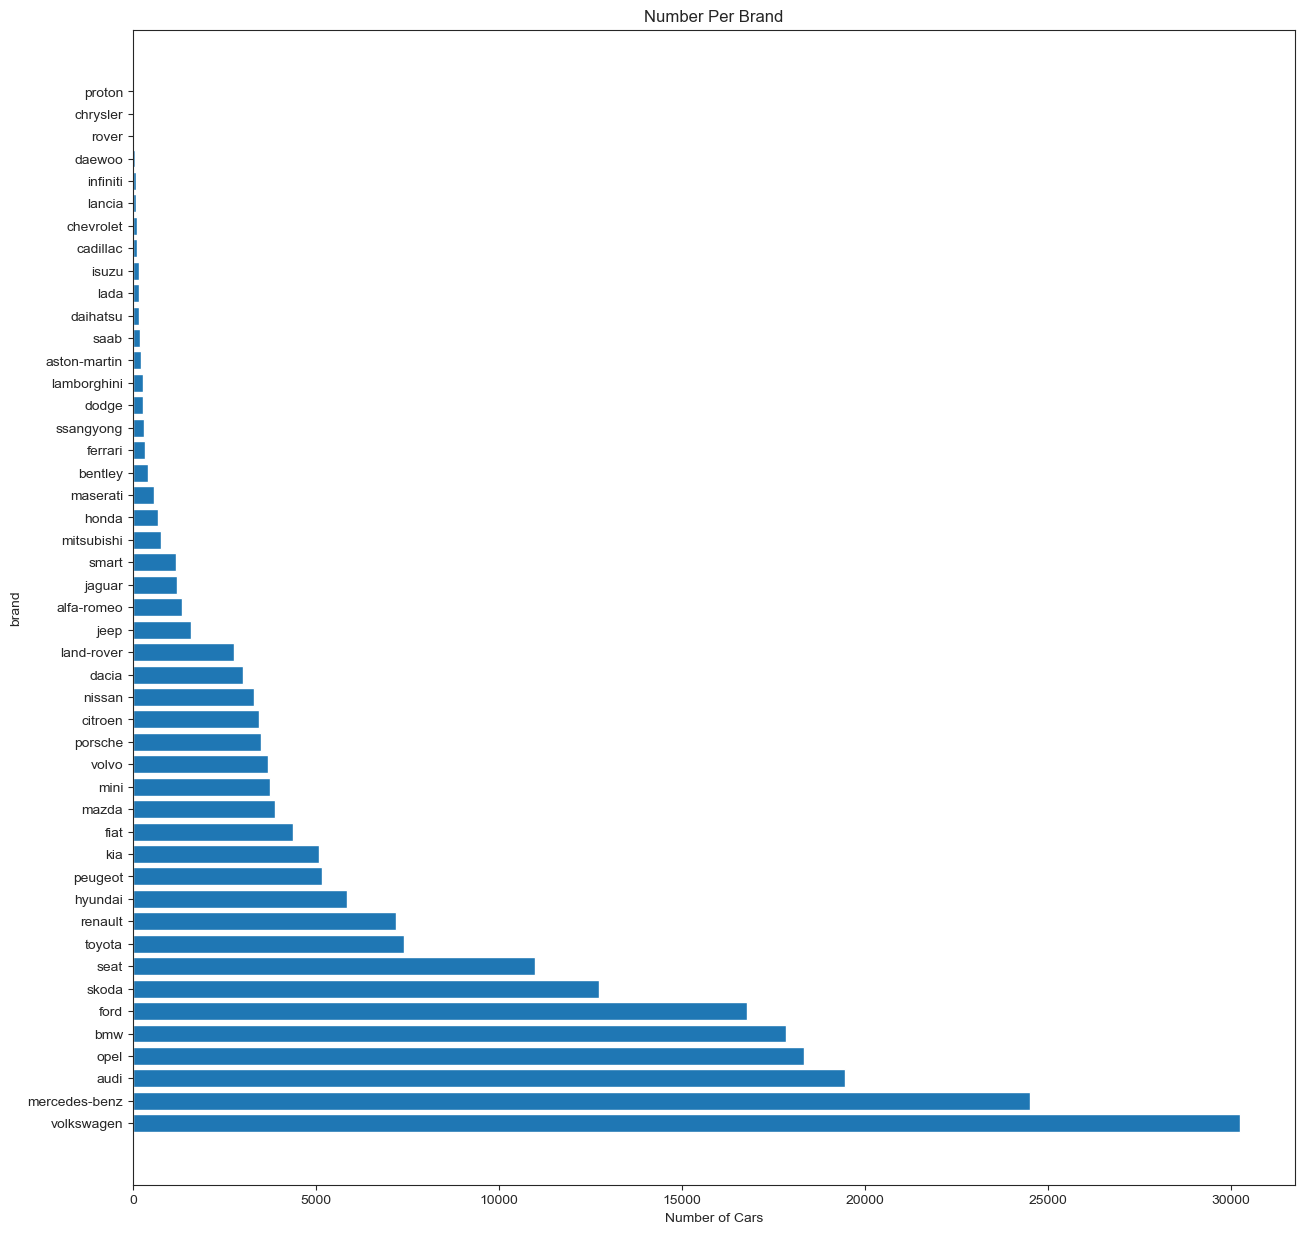

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('ticks')
#colors = sns.color_palette('pastel')
plt.figure(figsize=(15,15))

plt.barh(df['brand'].value_counts().index, df['brand'].value_counts().values)
plt.xlabel('Number of Cars')
plt.ylabel('brand')
plt.title('Number Per Brand')

In [75]:
print(df['brand'].value_counts())
print(df['brand'])

brand
volkswagen       30258
mercedes-benz    24521
audi             19475
opel             18350
bmw              17850
ford             16774
skoda            12734
seat             10986
toyota            7405
renault           7193
hyundai           5859
peugeot           5166
kia               5074
fiat              4362
mazda             3897
mini              3758
volvo             3685
porsche           3502
citroen           3454
nissan            3308
dacia             3022
land-rover        2759
jeep              1579
alfa-romeo        1341
jaguar            1205
smart             1175
mitsubishi         763
honda              675
maserati           581
bentley            400
ferrari            326
ssangyong          296
dodge              282
lamborghini        278
aston-martin       221
saab               199
daihatsu           180
lada               163
isuzu              156
cadillac           119
chevrolet          113
lancia              96
infiniti            86
daewo

#### Note.
From the above diagram we would like to consider brands whose count is more than 10000

In [76]:
bcount = df['brand'].value_counts()
print(type(bcount))
main_brands = bcount[bcount > 10000]
new_df = df[df['brand'].isin(main_brands.index)]
print(main_brands)
print(len(new_df))
print(len(df['brand']))
print(len(new_df['brand'])/len(df['brand']))

<class 'pandas.core.series.Series'>
brand
volkswagen       30258
mercedes-benz    24521
audi             19475
opel             18350
bmw              17850
ford             16774
skoda            12734
seat             10986
Name: count, dtype: int64
150948
223733
0.67467919350297


In [77]:
# Convert brand values from string into numerical
new_df['brand'] = new_df['brand'].map({'volkswagen':0, 'mercedes-benz':1, 'audi':2, 'opel':3, 
                               'bmw':4, 'ford':5, 'skoda':6, 'seat':7 })

/var/folders/px/qy02cbjn2_s1svhmg7_fwh340000gq/T/ipykernel_3471/2218050945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['brand'] = new_df['brand'].map({'volkswagen':0, 'mercedes-benz':1, 'audi':2, 'opel':3,


In [78]:
new_df['brand']

1714      2
1715      2
1716      2
1717      2
1718      2
         ..
246905    0
246907    0
246908    0
246911    0
246912    0
Name: brand, Length: 150948, dtype: int64

In [79]:
for x in selected_cols:
    print(x, new_df[x].dtype)

year int64
price int64
power_kw float64
mileage_in_km float64
brand int64
model object


So our new data frame covers more than 67% of the cars listed.

Text(0.5, 1.0, 'Number Per Year')

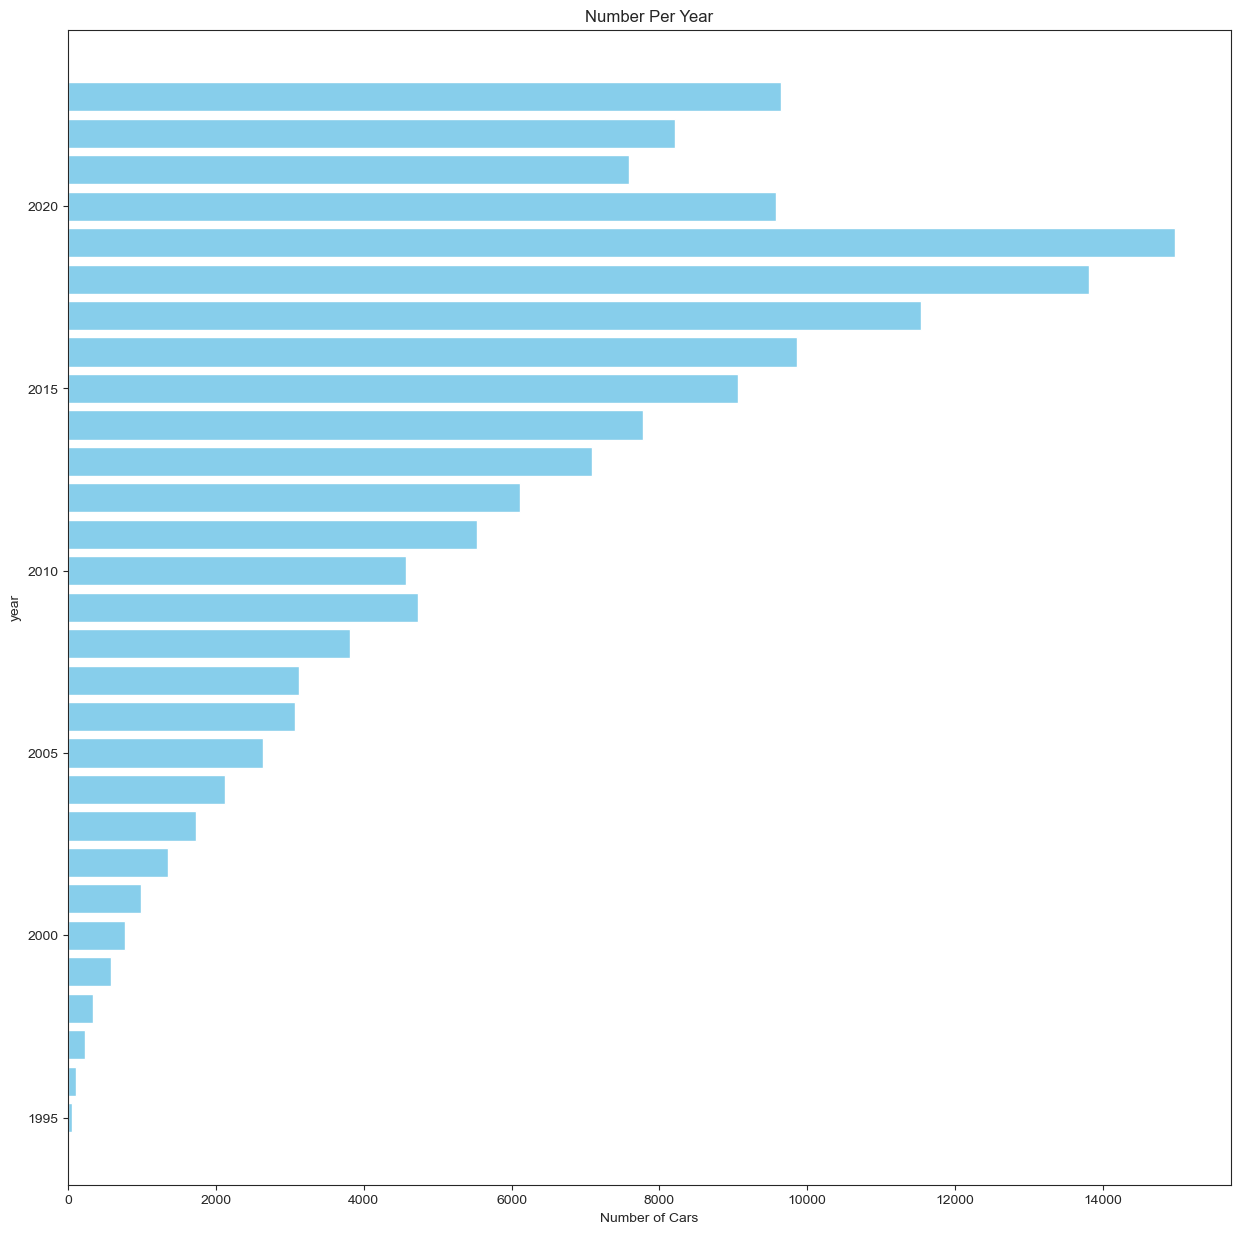

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('ticks')
plt.figure(figsize=(15,15))

year_counts = new_df['year'].value_counts().sort_index()
plt.barh(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Number of Cars')
plt.ylabel('year')
plt.title('Number Per Year')



In [81]:
# the digram suggets that there are not enough listings for old cars. 
# So we update our listing to years with more than 5000 listings
ycount = new_df['year'].value_counts()
#print(ycount)

main_years = ycount[ycount > 5000]
print(main_years)
new_ydf = new_df[new_df['year'].isin(main_years.index)]
#print(new_ydf)

print(len(new_df['year']))
print(len(new_ydf['year']))
print(len(new_ydf['year'])/len(new_df['year']))

year
2019    14984
2018    13813
2017    11540
2016     9863
2023     9645
2020     9581
2015     9066
2022     8216
2014     7776
2021     7584
2013     7091
2012     6107
2011     5530
Name: count, dtype: int64
150948
120796
0.8002490924026817


So a big majority of the previous data (80%) is extracted  

Text(0.5, 1.0, 'Average Price Per Year')

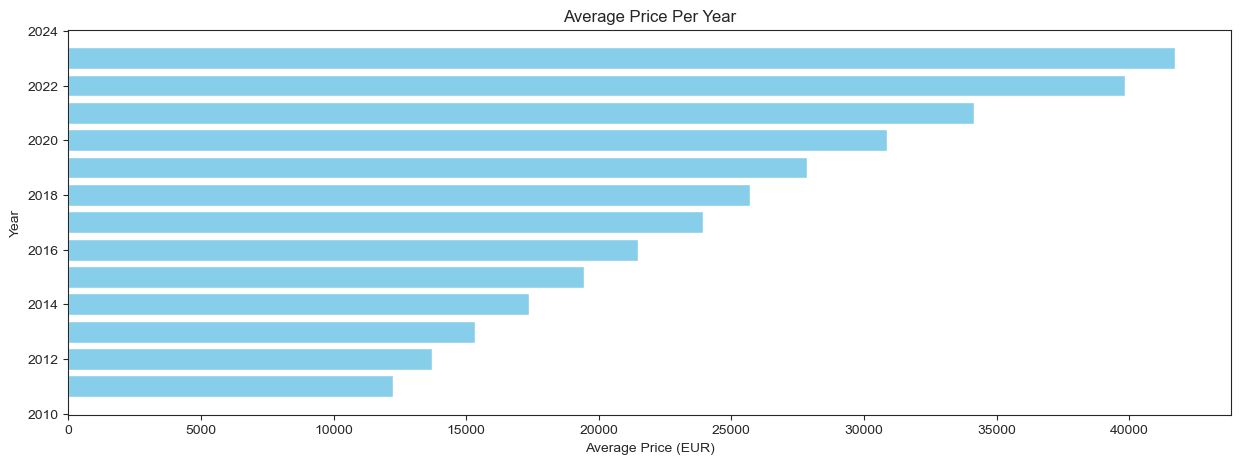

In [82]:
#plotting a diagram for price per brands
YearPrice = new_ydf[['year', 'price']].groupby('year').mean().sort_index()

plt.figure(figsize=(15,5))
plt.barh(YearPrice.index, YearPrice['price'], color='skyblue')
plt.xlabel('Average Price (EUR)')
plt.ylabel('Year')
plt.title('Average Price Per Year')

Text(0.5, 1.0, 'Average Price Per Brand')

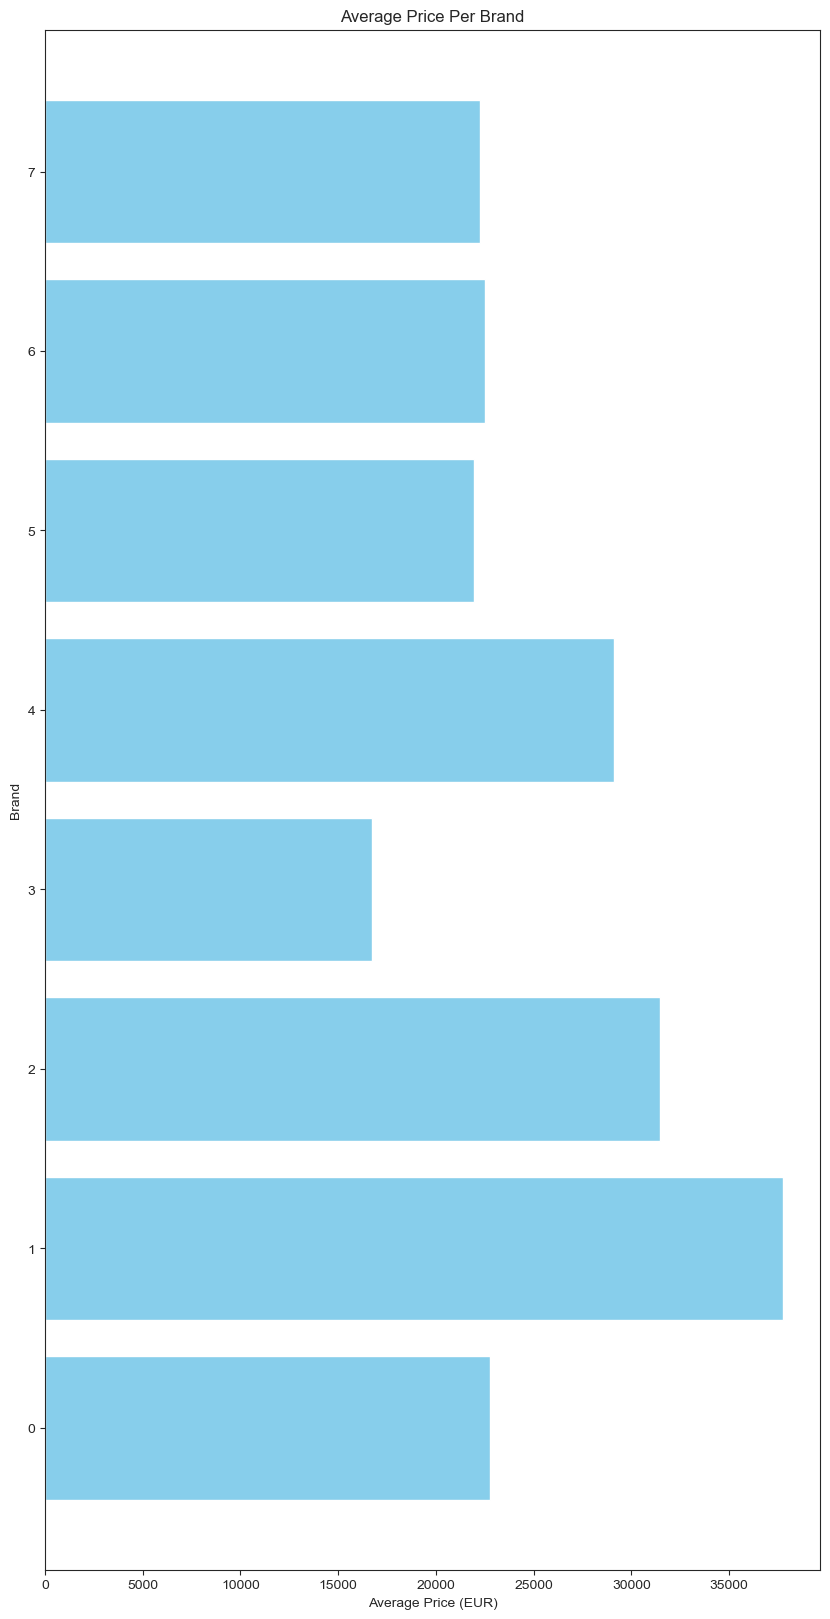

In [83]:
# Digram for price per brand
brand_price = new_ydf[['brand', 'price']].groupby('brand').mean()

plt.figure(figsize=(10,20))
plt.barh(brand_price.index, brand_price['price'], color = 'skyblue')
plt.xlabel('Average Price (EUR)')
plt.ylabel('Brand')
plt.title('Average Price Per Brand')

/var/folders/px/qy02cbjn2_s1svhmg7_fwh340000gq/T/ipykernel_3471/1687176560.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ydf['price_range'] = pd.cut(new_ydf['price'], bins=bins, labels=labels, right=False)


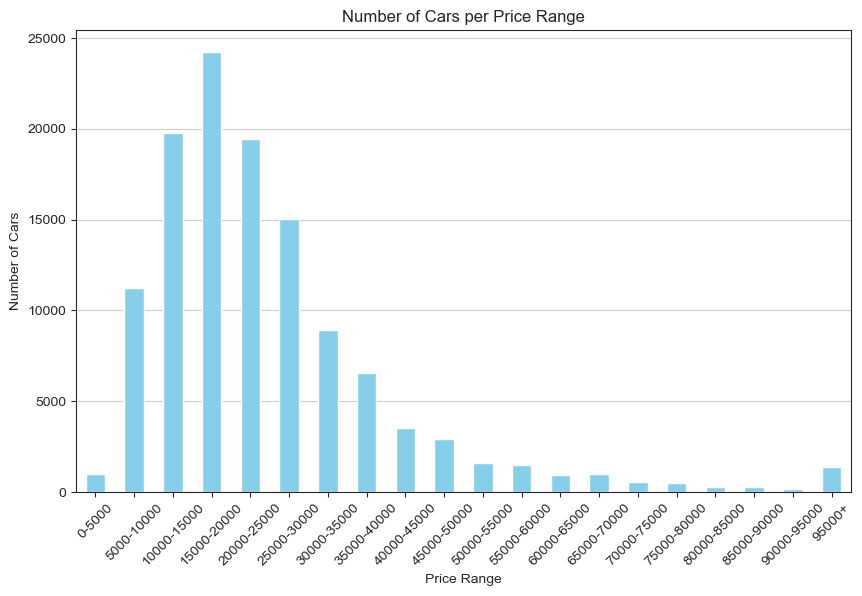

In [84]:
# Plot number of cars per price range

# Range of price
min_price = 0
max_price = 100000
steps = 5000

# Bins and labels
bins = []
labels = []
current_price = min_price

while current_price < max_price:
    bins.append(current_price)
    if current_price + steps >= max_price:
        labels.append(f'{current_price}+')
    else:
        labels.append(f'{current_price}-{current_price + steps}')
    current_price += steps

# One last bin covering everything above max_price
bins.append(float('inf'))

# Categorize prices into bins
new_ydf['price_range'] = pd.cut(new_ydf['price'], bins=bins, labels=labels, right=False)

# Count the number of cars in each price range
price_range_counts = new_ydf['price_range'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Cars per Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [86]:
# So we only consider the price range 5000-30000
filterd_df = new_ydf.query('5000 <= price <=30000')
filterd_df

,brand,model,color,registration_date,year,price,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,price_range
5296,2,Audi A3,blue,10/2011,2011,9900,103.0,140,Manual,Diesel,"5,1 l/100 km",NaN,119000.0,2.0 TDI Ambition (103kW) (8P1),5000-10000
5298,2,Audi TT,blue,05/2011,2011,9290,118.0,160,Manual,Petrol,"6,4 l/100 km",NaN,184574.0,1.8 TFSI Coupe*Xenon*Leder*Alus*Top,5000-10000
5299,2,Audi A3,blue,02/2011,2011,9499,77.0,105,Manual,Diesel,"4,2 l/100 km",NaN,114860.0,1.6 TDI Ambition/2.Hd/SportF/TSGS/PDC/BT/SHZ/,5000-10000
5300,2,Audi A3,blue,05/2011,2011,11990,103.0,140,Automatic,Diesel,"5,6 l/100 km",NaN,205013.0,2.0 TDI *Leder*Automatik*Tempomat*Shz*PDC*,10000-15000
5301,2,Audi A6,blue,11/2011,2011,10900,150.0,204,Manual,Diesel,"5,3 l/100 km",NaN,192350.0,Avant 3.0 V6 *Alcantara*MMI*Xenon*Rollo*,10000-15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246898,0,Volkswagen Caddy,orange,05/2023,2023,28988,75.0,102,Manual,Diesel,"4,6 l/100 km",NaN,10.0,Maxi 2.0 TDI 102 Klima CompA HFT,25000-30000
246899,0,Volkswagen T-Cross,orange,01/2023,2023,29077,81.0,110,Manual,Petrol,"4,8 l/100 km",NaN,1869.0,1.0 TSI R-Line | NAVI | ACC | LED | PDC,25000-30000
246900,0,Volkswagen Caddy,orange,05/2023,2023,28780,75.0,102,Manual,Diesel,"4,6 l/100 km",NaN,10.0,Cargo Maxi 2.0 TDI 102 Klima CompA HFT 75 kW (...,25000-30000
246905,0,Volkswagen Transporter,orange,02/2023,2023,28788,81.0,110,Manual,Diesel,"7,7 l/100 km",NaN,5.0,T6.1 2.0 TDI Pritsche Doppelkabine lang,25000-30000


### 1-2-Featuer Engineering

In [87]:
print(numerical_cols)
print(categorical_cols)

['year', 'price', 'power_kw', 'mileage_in_km']
['brand', 'model']


In [89]:
# we check how the data is distributed per model:
model_count = filterd_df['model'].value_counts()
print(len(model_count))
major_models = model_count[model_count > 1000]
print(len(major_models))

389
21


Since only 29 out of 484 models have more than 1000 listing. 
Therefore we drop model from our feature list

In [90]:
categorical_cols = ['brand']
selected_cols = numerical_cols + categorical_cols
print(selected_cols)

['year', 'price', 'power_kw', 'mileage_in_km', 'brand']


In [91]:
# Finally we extract our new data frame out of the selected features
selected_df = filterd_df[selected_cols]
print(selected_df)

        year  price  power_kw  mileage_in_km  brand
5296    2011   9900     103.0       119000.0      2
5298    2011   9290     118.0       184574.0      2
5299    2011   9499      77.0       114860.0      2
5300    2011  11990     103.0       205013.0      2
5301    2011  10900     150.0       192350.0      2
...      ...    ...       ...            ...    ...
246898  2023  28988      75.0           10.0      0
246899  2023  29077      81.0         1869.0      0
246900  2023  28780      75.0           10.0      0
246905  2023  28788      81.0            5.0      0
246907  2023  28420      81.0         4900.0      0

[89728 rows x 5 columns]


In [92]:
# Convert 'price' column to numeric
selected_df['price'] = pd.to_numeric(selected_df['price'], errors='coerce')

/var/folders/px/qy02cbjn2_s1svhmg7_fwh340000gq/T/ipykernel_3471/4197392231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['price'] = pd.to_numeric(selected_df['price'], errors='coerce')


In [93]:
# writing down the final data into a new csv file
selected_df.to_csv('final_car_data.csv', index = False)